In [2]:
import sys
import os

# Racine du projet (1 niveau au-dessus du notebook)
sys.path.append(os.path.abspath(".."))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from src.data_loader import DataLoader
from src.returns import compute_log_returns

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)


In [3]:
ETF_LIST = ["XLK", "XLF", "XLE", "XLV", "XLI", "XLY", "XLP", "XLU"]

loader = DataLoader("../data/raw")
prices = loader.load_prices(ETF_LIST)

returns = compute_log_returns(prices)
returns.head()


,XLK,XLF,XLE,XLV,XLI,XLY,XLP,XLU
Date,,,,,,,,
2015-01-05,-0.015383,-0.021251,-0.042248,-0.005113,-0.023636,-0.019311,-0.007057,-0.012302
2015-01-06,-0.012130,-0.015401,-0.014799,-0.003374,-0.012397,-0.010013,-0.001251,0.000640
2015-01-07,0.008433,0.010432,0.002127,0.023240,0.007493,0.015690,0.016957,0.009762
2015-01-08,0.021742,0.014833,0.022201,0.016941,0.019831,0.014890,0.015059,0.006945
2015-01-09,-0.003146,-0.013588,-0.007957,-0.008933,-0.010768,-0.011640,-0.008112,-0.006311


In [4]:
# Standardize the returns
scaler = StandardScaler()
X = scaler.fit_transform(returns.values)


In [5]:
# Apply PCA
pca = PCA()
pca.fit(X)


PCA()

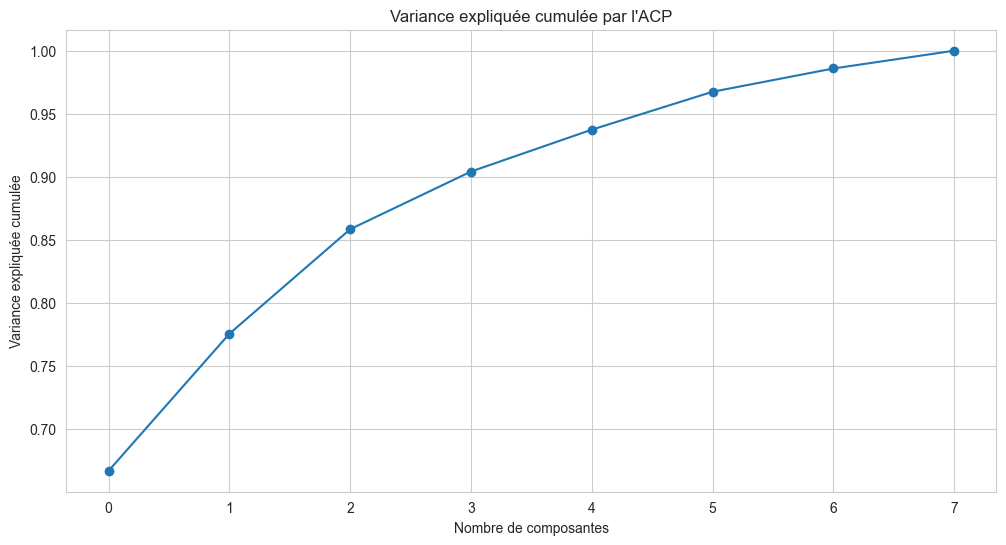

In [6]:
# Plot explained variance
explained_var = pca.explained_variance_ratio_

plt.plot(np.cumsum(explained_var), marker='o')
plt.xlabel("Nombre de composantes")
plt.ylabel("Variance expliquée cumulée")
plt.title("Variance expliquée cumulée par l'ACP")
plt.show()


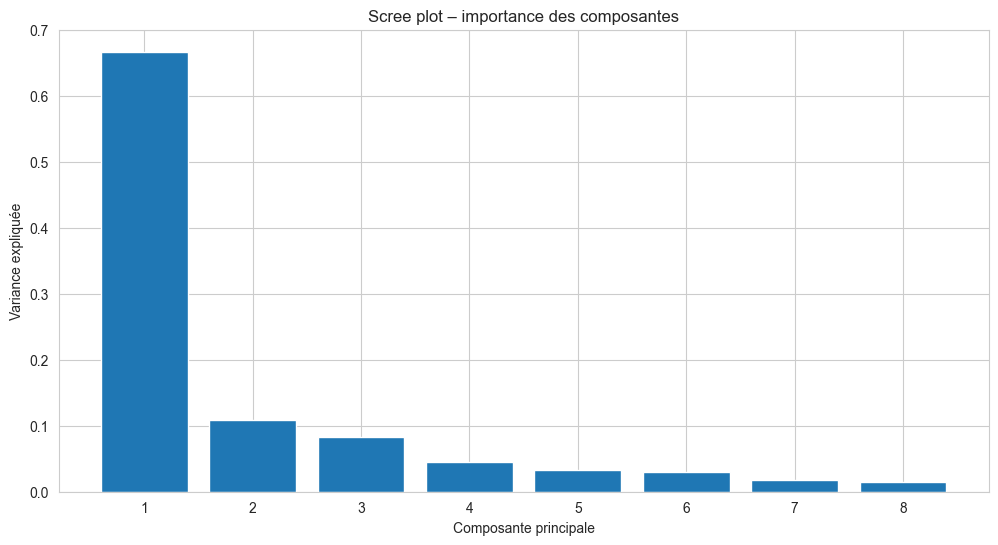

In [7]:
# Scree plot
plt.bar(range(1, len(explained_var) + 1), explained_var)
plt.xlabel("Composante principale")
plt.ylabel("Variance expliquée")
plt.title("Scree plot – importance des composantes")
plt.show()


In [8]:
# PCA loadings (poids des ETF)
loadings = pd.DataFrame(
    pca.components_.T,
    index=ETF_LIST,
    columns=[f"PC{i+1}" for i in range(len(ETF_LIST))]
)

loadings.round(3)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
XLK,0.360,-0.212,-0.485,-0.232,0.325,0.197,-0.598,-0.184
XLF,0.385,-0.210,0.175,0.096,-0.446,-0.470,-0.092,-0.583
XLE,0.301,-0.366,0.708,-0.040,0.323,0.401,0.074,-0.045
XLV,0.361,0.169,-0.147,0.721,0.475,-0.201,0.182,0.024
XLI,0.401,-0.165,0.084,-0.045,-0.232,-0.289,-0.214,0.787
XLY,0.370,-0.231,-0.402,-0.291,-0.102,0.141,0.731,0.009
XLP,0.344,0.483,0.004,0.225,-0.475,0.600,-0.112,-0.012
XLU,0.291,0.660,0.207,-0.528,0.274,-0.275,0.057,-0.068


In [9]:
loadings["PC1"].sort_values(ascending=False)


XLI    0.401428
XLF    0.385363
XLY    0.369711
XLV    0.361255
XLK    0.359918
XLP    0.343795
XLE    0.301012
XLU    0.291232
Name: PC1, dtype: float64

In [10]:
loadings["PC2"].sort_values()


XLE   -0.365699
XLY   -0.231140
XLK   -0.212258
XLF   -0.210131
XLI   -0.164581
XLV    0.168643
XLP    0.482688
XLU    0.659632
Name: PC2, dtype: float64

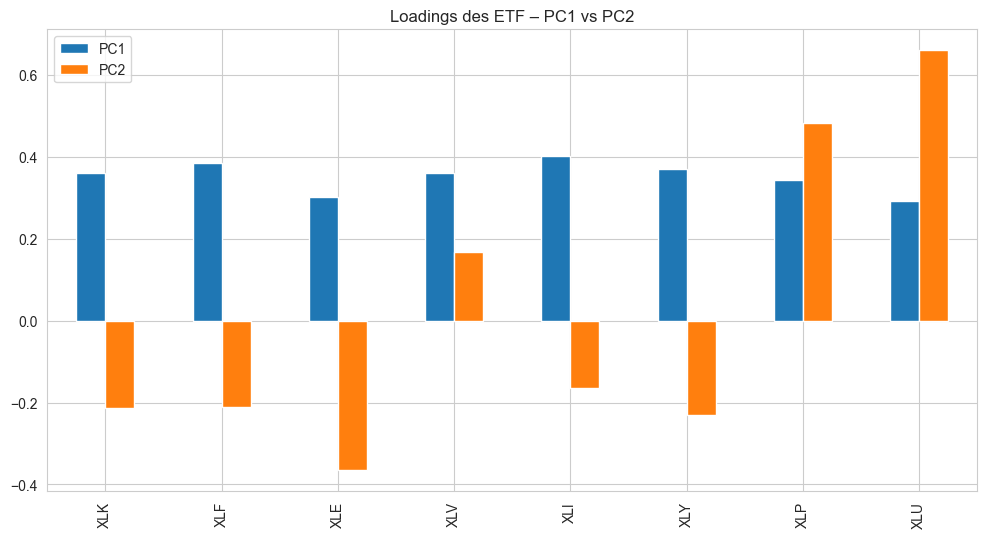

In [11]:
# Visualize loadings for PC1 and PC2
loadings[["PC1", "PC2"]].plot(kind="bar")
plt.title("Loadings des ETF – PC1 vs PC2")
plt.show()
